<a href="https://colab.research.google.com/github/AliAzizifar77/ML-P-UNIVR/blob/main/ML_AND_AI_FINAL24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Dataset:**
[SPAMBASE](https://archive.ics.uci.edu/dataset/94/spambase)

In [3]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB

`pandas` and `numpy` are libraries that provide tools for handling and processing data.

`matplotlib.pyplot` and `seaborn` are for data visualization.

`sklearn (or SciKit-Learn)` is a library that provides many unsupervised and supervised learning algorithms.

`imblearn` is a library used to handle imbalanced datasets.

In [9]:
# Define column names based on spambase.names and Load the data

column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order',
                'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
                'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business',
                'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
                'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
                'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
                'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
                'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
                'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
                'capital_run_length_longest', 'capital_run_length_total', 'spam']

df_spambase = pd.read_csv('spambase.data', names=column_names)
print(df_spambase)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

The dataset contains 4601 rows and 58 columns. Each row represents an email, and each column represents an attribute or feature of that email. The features are various measurements related to the content of the email. For example, *'word_freq_make'* represents the frequency of the word "make" in the email, *'word_freq_address'* represents the frequency of the word "address", and so on. there are also features that represent the frequency of certain special characters in the email (like *'char_freq_;'*, *'char_freq_*(', etc.).

The target variable is *'spam'*, where 1 represents a spam email and 0 represents a *'non-spam'* email.

In [15]:
print('instances (rows) and attributes (columns): ', df_spambase.shape)

instances (rows) and attributes (columns):  (4601, 58)


The *'shape'* property is commonly used to get a quick understanding of how large the dataset is.

In [ ]:
# What if df_spambase is a non-empty DataFrame...
missing_vals = df_spambase.isnull().sum()
if missing_vals.any():
    print("Missing values detected, filling with column means...")
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_spambase = pd.DataFrame(imputer.fit_transform(df_spambase), columns = df_spambase.columns)
else:
    print("No missing values detected.")

No missing values detected.


In [ ]:
# Get descriptive statistics of the DataFrame

df_spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
# Count the number of occurrences of each unique value in the 'spam' column

print('Distribution of the classes in the target column:')
print(df_spambase['spam'].value_counts())

Distribution of the classes in the target column:
0    2788
1    1813
Name: spam, dtype: int64


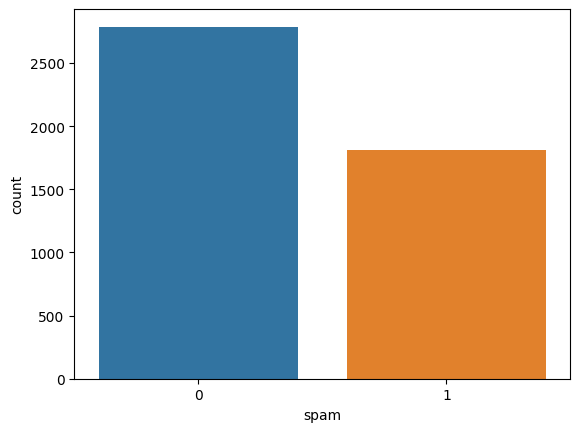

In [ ]:
# Bar chart
# Visualize the counts of observations in each categorical bin using a count plot

sns.countplot(x='spam', data=df_spambase)
plt.show()

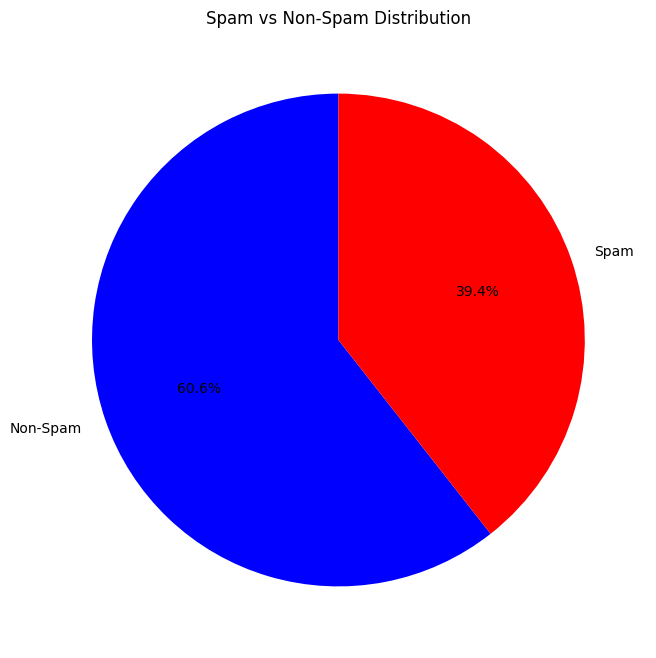

In [ ]:
# Pie Chart
# Showing the percentage distribution of Spam and Non-Spam instances in the dataset

spam_counts = df_spambase['spam'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(spam_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Spam vs Non-Spam Distribution')
plt.show()

In [ ]:
# Preprocessing

# Define features and target
X = df_spambase.drop('spam', axis=1)
y = df_spambase['spam']

# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_s, y_train_s = ros.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test = scaler.transform(X_test)

In [ ]:
# SVM Classifier

# Initialize parameters, the default C = 1.0
kernel = 'linear'
max_iteration = 10000

# Initialize the SVM classification model.
model_C_1 = SVC(kernel=kernel, max_iter=max_iteration)

# Train (fit) the model.
model_C_1.fit(X_train_s, y_train_s)

# Make predictions
predicted_C_1 = model_C_1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Confusion Matrix for SVM with C=1:
[[497  34]
 [ 37 353]]


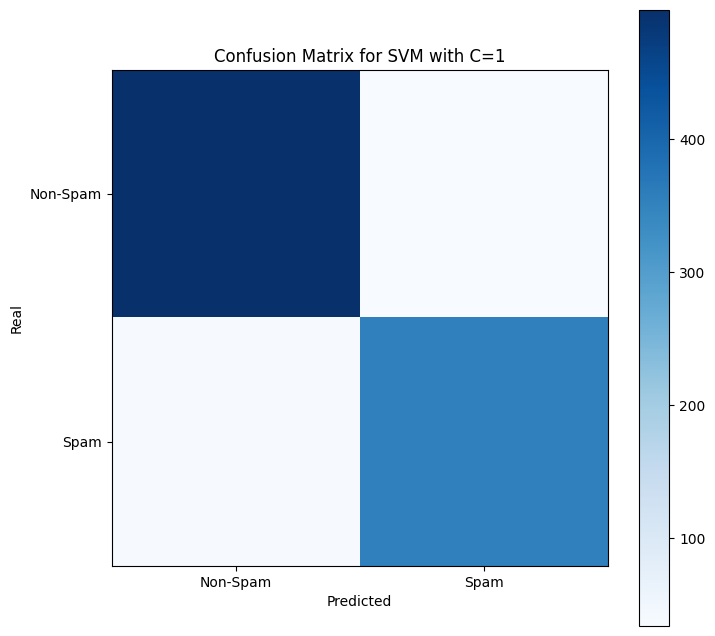

In [ ]:
# Calculate confusion matrix using sklearn.
conf_mat_C_1 = confusion_matrix(y_test, predicted_C_1)

# Print and then perform an imshow of the confusion matrix
print("Confusion Matrix for SVM with C=1:")
print(conf_mat_C_1)

# imshow of the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(conf_mat_C_1, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Non-Spam","Spam"])
plt.yticks([0,1],["Non-Spam","Spam"])
plt.ylabel("Real")
plt.title('Confusion Matrix for SVM with C=1')
plt.show()

In [ ]:
# Use sklearn to calculate the accuracy, precision and recall
accuracy_C_1 = accuracy_score(y_test, predicted_C_1)
precision_nonspam_C_1 = precision_score(y_test, predicted_C_1, pos_label=0)
precision_spam_C_1 = precision_score(y_test, predicted_C_1, pos_label=1)
recall_nonspam_C_1 = recall_score(y_test, predicted_C_1, pos_label=0)
recall_spam_C_1 = recall_score(y_test, predicted_C_1, pos_label=1)

print('Classifier accuracy with C=1: ' + "{0:.2f}".format(accuracy_C_1*100) + '%')
print('Precision with respect to non-spam class with C=1: ' + "{0:.2f}".format(precision_nonspam_C_1))
print('Precision with respect to spam class with C=1: ' + "{0:.2f}".format(precision_spam_C_1))
print('Recall with respect to non-spam class with C=1: ' + "{0:.2f}".format(recall_nonspam_C_1))
print('Recall with respect to spam class with C=1: ' + "{0:.2f}".format(recall_spam_C_1))

Classifier accuracy with C=1: 92.29%
Precision with respect to non-spam class with C=1: 0.93
Precision with respect to spam class with C=1: 0.91
Recall with respect to non-spam class with C=1: 0.94
Recall with respect to spam class with C=1: 0.91


In [ ]:
# SVM Classifier with C=0.1

# Initialize parameters.
kernel = 'linear'
C_param = 0.1
max_iteration = 10000

# Initialize the SVM classification model.
model_C_0_1 = SVC(kernel=kernel, C=C_param, max_iter=max_iteration)

# Train (fit) the model.
model_C_0_1.fit(X_train_s, y_train_s)

# Make predictions
predicted_C_0_1 = model_C_0_1.predict(X_test)

Confusion Matrix for SVM with C=0.1:
[[502  29]
 [ 33 357]]


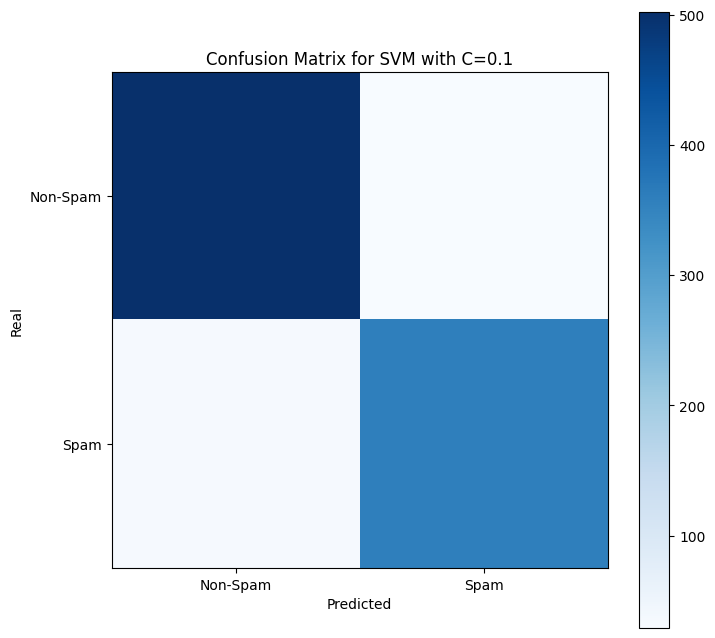

In [ ]:
# Compute confusion matrix
conf_mat_svm_C_0_1 = confusion_matrix(y_test, predicted_C_0_1)

# Display the confusion matrix
print("Confusion Matrix for SVM with C=0.1:")
print(conf_mat_svm_C_0_1)

# imshow of the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(conf_mat_svm_C_0_1, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Non-Spam","Spam"])
plt.yticks([0,1],["Non-Spam","Spam"])
plt.ylabel("Real")
plt.title('Confusion Matrix for SVM with C=0.1')
plt.show()

In [ ]:
# Compute performance metrics
accuracy_svm_C_0_1 = accuracy_score(y_test, predicted_C_0_1)
precision_nonspam_svm_C_0_1 = precision_score(y_test, predicted_C_0_1, pos_label=0)
precision_spam_svm_C_0_1 = precision_score(y_test, predicted_C_0_1, pos_label=1)
recall_nonspam_svm_C_0_1 = recall_score(y_test, predicted_C_0_1, pos_label=0)
recall_spam_svm_C_0_1 = recall_score(y_test, predicted_C_0_1, pos_label=1)

print('Accuracy (SVM with C=0.1): ' + "{0:.2f}".format(accuracy_svm_C_0_1*100) + '%')
print('Precision (Non-Spam, SVM with C=0.1): ', precision_nonspam_svm_C_0_1)
print('Precision (Spam, SVM with C=0.1): ', precision_spam_svm_C_0_1)
print('Recall (Non-Spam, SVM with C=0.1): ', recall_nonspam_svm_C_0_1)
print('Recall (Spam, SVM with C=0.1): ', recall_spam_svm_C_0_1)

Accuracy (SVM with C=0.1): 93.27%
Precision (Non-Spam, SVM with C=0.1):  0.9383177570093458
Precision (Spam, SVM with C=0.1):  0.9248704663212435
Recall (Non-Spam, SVM with C=0.1):  0.9453860640301318
Recall (Spam, SVM with C=0.1):  0.9153846153846154


In [ ]:
# SVM Classifier with C=10

# Initialize parameters.
C_param = 10

# Initialize the SVM classification model.
model_C_10 = SVC(kernel=kernel, C=C_param, max_iter=max_iteration)

# Train (fit) the model.
model_C_10.fit(X_train_s, y_train_s)

# Make predictions
predicted_C_10 = model_C_10.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Confusion Matrix for SVM with C=10:
[[242 289]
 [ 19 371]]


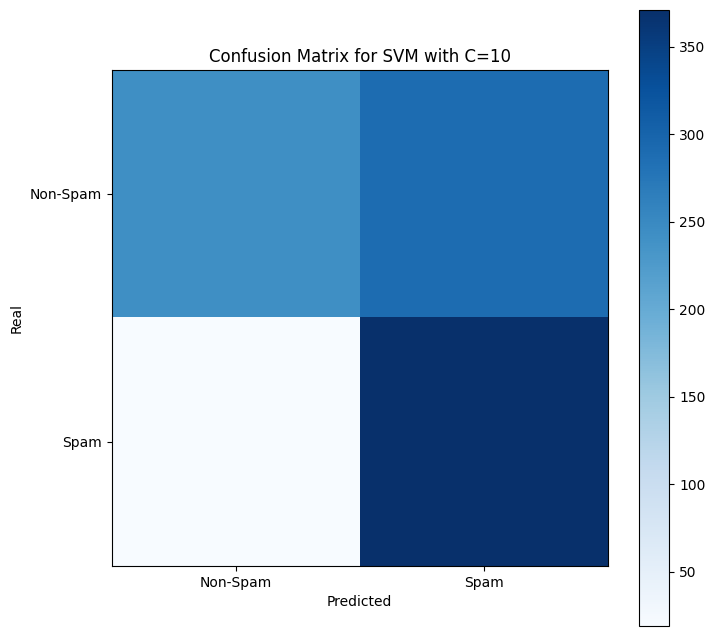

In [ ]:
# Compute confusion matrix
conf_mat_svm_C_10 = confusion_matrix(y_test, predicted_C_10)

# Display the confusion matrix
print("Confusion Matrix for SVM with C=10:")
print(conf_mat_svm_C_10)

# imshow of the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(conf_mat_svm_C_10, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Non-Spam","Spam"])
plt.yticks([0,1],["Non-Spam","Spam"])
plt.ylabel("Real")
plt.title('Confusion Matrix for SVM with C=10')
plt.show()

In [ ]:
# Compute performance metrics
accuracy_svm_C_10 = accuracy_score(y_test, predicted_C_10)
precision_nonspam_svm_C_10 = precision_score(y_test, predicted_C_10, pos_label=0)
precision_spam_svm_C_10 = precision_score(y_test, predicted_C_10, pos_label=1)
recall_nonspam_svm_C_10 = recall_score(y_test, predicted_C_10, pos_label=0)
recall_spam_svm_C_10 = recall_score(y_test, predicted_C_10, pos_label=1)

print('Accuracy (SVM with C=10): ' + "{0:.2f}".format(accuracy_svm_C_10*100) + '%')
print('Precision (Non-Spam, SVM with C=10): ', precision_nonspam_svm_C_10)
print('Precision (Spam, SVM with C=10): ', precision_spam_svm_C_10)
print('Recall (Non-Spam, SVM with C=10): ', recall_nonspam_svm_C_10)
print('Recall (Spam, SVM with C=10): ', recall_spam_svm_C_10)

Accuracy (SVM with C=10): 66.56%
Precision (Non-Spam, SVM with C=10):  0.9272030651340997
Precision (Spam, SVM with C=10):  0.5621212121212121
Recall (Non-Spam, SVM with C=10):  0.455743879472693
Recall (Spam, SVM with C=10):  0.9512820512820512


In [ ]:
# SVM Classifier

# Initialize parameters
kernel = 'poly'
degree = 3
max_iteration = 10000

# Initialize the SVM classification model.
model = SVC(kernel=kernel, degree=degree, max_iter=max_iteration)

# Train (fit) the model.
model.fit(X_train_s, y_train_s)

# Make predictions
predicted = model.predict(X_test)

Confusion Matrix for SVM with Poly Kernel:
[[511  20]
 [ 63 327]]


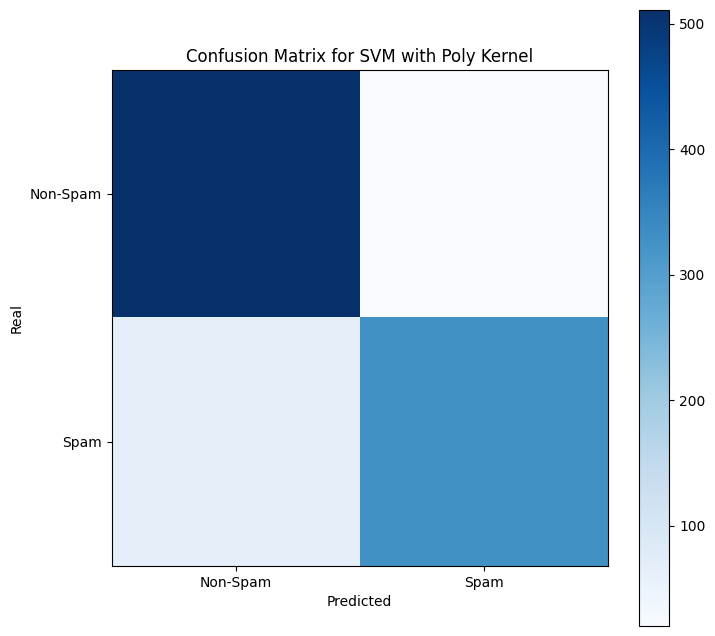

In [ ]:
# Calculate confusion matrix using sklearn.
conf_mat = confusion_matrix(y_test, predicted)

# Print and then perform an imshow of the confusion matrix.
print("Confusion Matrix for SVM with Poly Kernel:")
print(conf_mat)

# imshow of the confusion matrix
plt.figure(figsize=(8,8))
plt.imshow(conf_mat, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["Non-Spam","Spam"])
plt.yticks([0,1],["Non-Spam","Spam"])
plt.ylabel("Real")
plt.title('Confusion Matrix for SVM with Poly Kernel')
plt.show()

In [ ]:
# Use sklearn to calculate the accuracy, precision and recall

accuracy = accuracy_score(y_test, predicted)
precision_nonspam = precision_score(y_test, predicted, pos_label=0)
precision_spam = precision_score(y_test, predicted, pos_label=1)
recall_nonspam = recall_score(y_test, predicted, pos_label=0)
recall_spam = recall_score(y_test, predicted, pos_label=1)

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Precision with respect to non-spam class: ' + "{0:.2f}".format(precision_nonspam))
print('Precision with respect to spam class: ' + "{0:.2f}".format(precision_spam))
print('Recall with respect to non-spam class: ' + "{0:.2f}".format(recall_nonspam))
print('Recall with respect to spam class: ' + "{0:.2f}".format(recall_spam))

Classifier accuracy: 90.99%
Precision with respect to non-spam class: 0.89
Precision with respect to spam class: 0.94
Recall with respect to non-spam class: 0.96
Recall with respect to spam class: 0.84


Confusion Matrix for Naive Bayes:
[[388 143]
 [ 24 366]]


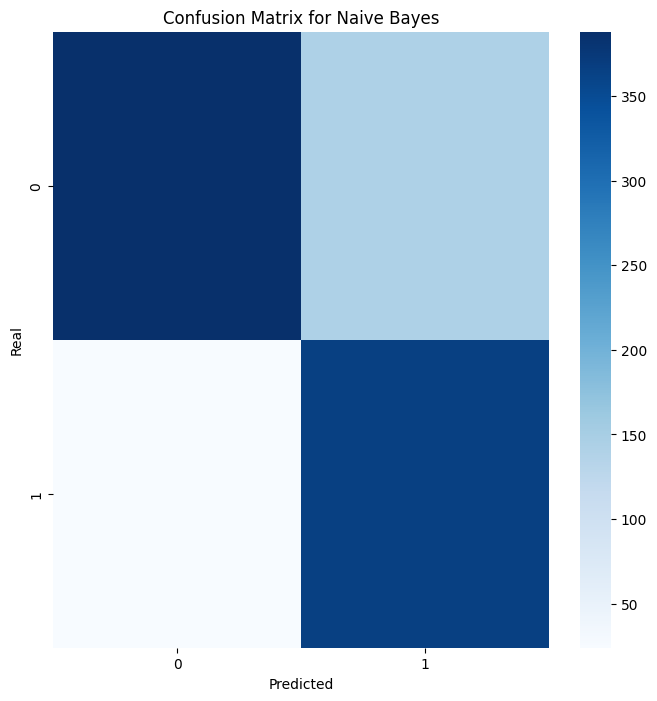

In [ ]:
# The Gaussian Naive Bayes classifier
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train_s, y_train_s)

# Make predictions
predicted_nb = model_nb.predict(X_test)

# Calculate the confusion matrix
conf_mat_nb = confusion_matrix(y_test, predicted_nb)

# Print the confusion matrix
print("Confusion Matrix for Naive Bayes:")
print(conf_mat_nb)

# Visualize the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat_nb, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [ ]:
# Use sklearn to calculate the accuracy, precision and recall.
accuracy_nb = accuracy_score(y_test, predicted_nb)
precision_nonspam_nb = precision_score(y_test, predicted_nb, pos_label=0)
precision_spam_nb = precision_score(y_test, predicted_nb, pos_label=1)
recall_nonspam_nb = recall_score(y_test, predicted_nb, pos_label=0)
recall_spam_nb = recall_score(y_test, predicted_nb, pos_label=1)

print('Naive Bayes Classifier accuracy: ' + "{0:.2f}".format(accuracy_nb*100) + '%')
print('Precision with respect to non-spam class: ' + "{0:.2f}".format(precision_nonspam_nb))
print('Precision with respect to spam class: ' + "{0:.2f}".format(precision_spam_nb))
print('Recall with respect to non-spam class: ' + "{0:.2f}".format(recall_nonspam_nb))
print('Recall with respect to spam class: ' + "{0:.2f}".format(recall_spam_nb))

Naive Bayes Classifier accuracy: 81.87%
Precision with respect to non-spam class: 0.94
Precision with respect to spam class: 0.72
Recall with respect to non-spam class: 0.73
Recall with respect to spam class: 0.94


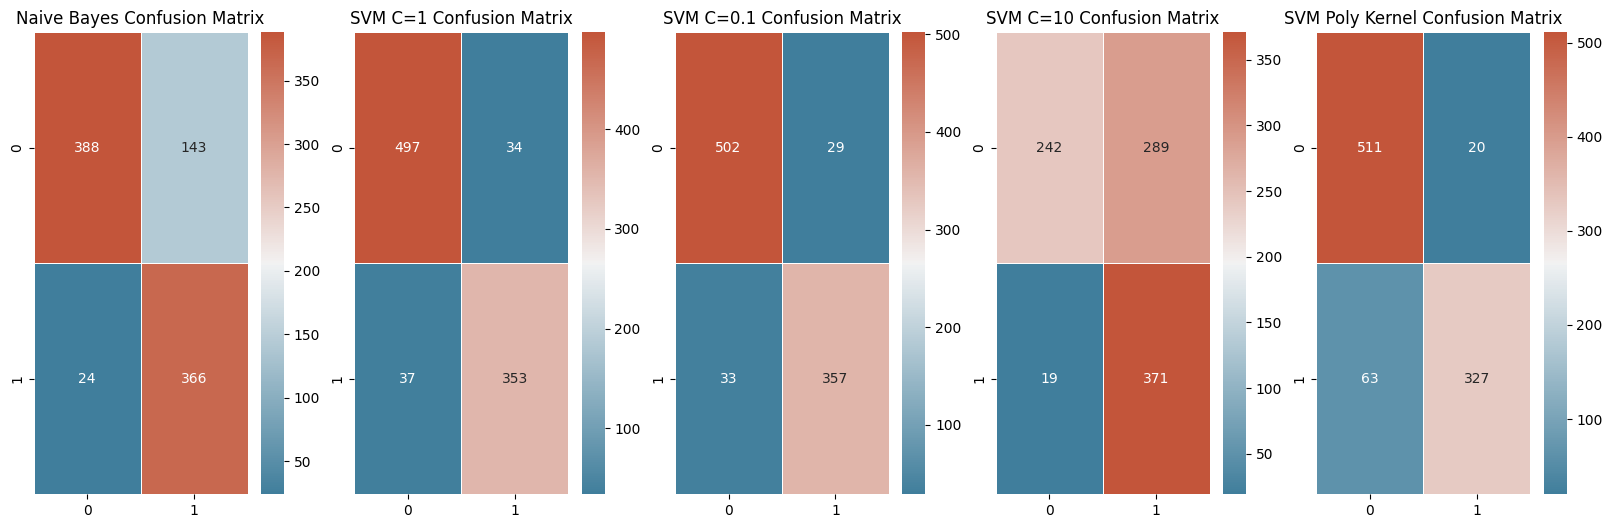

In [ ]:
# Confusion matrices
conf_matrices = [
    [[388, 143], [24, 366]],
    [[497, 34], [37, 353]],
    [[502, 29], [33, 357]],
    [[242, 289], [19, 371]],
    [[511, 20], [63, 327]]
]

model_names = ['Naive Bayes', 'SVM C=1', 'SVM C=0.1', 'SVM C=10', 'SVM Poly Kernel']

# Set up the matplotlib figure
f, axes = plt.subplots(1, len(conf_matrices), figsize=(20, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for i, conf_mat in enumerate(conf_matrices):
    # Draw heatmap
    sns.heatmap(conf_mat, annot=True, fmt="d", linewidths=.5, ax=axes[i], cmap=cmap)
    axes[i].set_title(model_names[i] + ' Confusion Matrix')

plt.show()

In [ ]:
# Prepare data for the DataFrame for plotting
data_for_plot = {
    'Model': ['Naive Bayes', 'SVM C=1', 'SVM C=0.1', 'SVM C=10', 'SVM Poly Kernel'],
    'Accuracy': [0.8187, 0.9229, 0.9327, 0.6656, 0.9099],
    'Precision (Non-Spam)': [0.94, 0.93, 0.938, 0.927, 0.89],
    'Precision (Spam)': [0.72, 0.91, 0.9248, 0.562, 0.94],
    'Recall (Non-Spam)': [0.73, 0.94, 0.9453, 0.4557, 0.96],
    'Recall (Spam)': [0.94, 0.91, 0.9153, 0.9512, 0.84]
}

# Create DataFrame
df_results_plot = pd.DataFrame(data_for_plot)

# Set 'Model' column as index
df_results_plot.set_index('Model', inplace=True)

# Convert to %
df_results = df_results_plot.applymap(lambda x: "{0:.2f}%".format(x * 100))

# Display the results
print(df_results)

                Accuracy Precision (Non-Spam) Precision (Spam)  \
Model                                                            
Naive Bayes       81.87%               94.00%           72.00%   
SVM C=1           92.29%               93.00%           91.00%   
SVM C=0.1         93.27%               93.80%           92.48%   
SVM C=10          66.56%               92.70%           56.20%   
SVM Poly Kernel   90.99%               89.00%           94.00%   

                Recall (Non-Spam) Recall (Spam)  
Model                                            
Naive Bayes                73.00%        94.00%  
SVM C=1                    94.00%        91.00%  
SVM C=0.1                  94.53%        91.53%  
SVM C=10                   45.57%        95.12%  
SVM Poly Kernel            96.00%        84.00%  


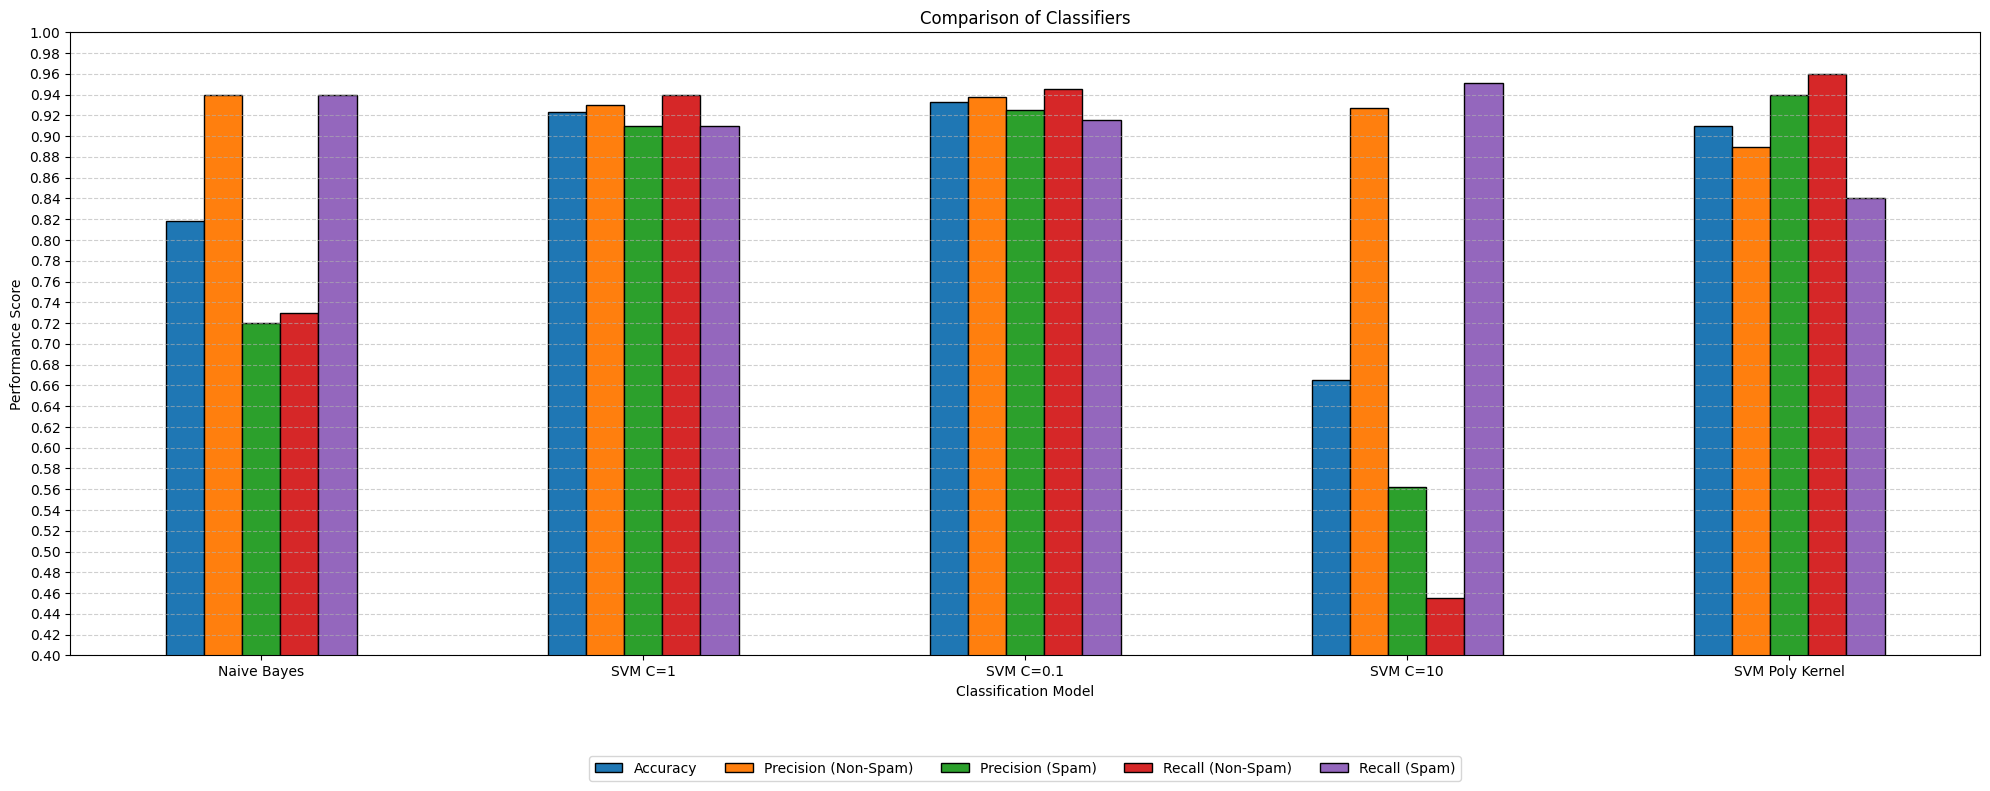

In [ ]:
# Plotting
ax = df_results_plot.plot(kind='bar', edgecolor = "black", rot=0, figsize=(20,8))

plt.title('Comparison of Classifiers')
plt.ylabel('Performance Score')
plt.xlabel('Classification Model')

plt.ylim([0.4,1])  # Range
plt.yticks(np.arange(0.4, 1.02, 0.02))  # Starts at 0, ends at 1, steps of 0.02
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Move the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# adjust the layout to avoid plot components overlap
plt.tight_layout()
plt.show()